# Задача №1 для Matryoshka

**Задача**

В документе предоставлены реальные данные по одному из проектов для когорт,
установивших игру с 21.09.23 по 28.09.23
Судя по этим данным, предположите, как нарастает ревеню в первый месяц жизни у
пользователей игры.
Во сколько раз увеличится ревеню нулевого дня (день установки игры), первого и
третьего дня к 30-му дню?


**Пояснение к таблицe:**

Лист `ad revenue` (данные по рекламному заработку):
- `Install_date` - дата установки игры пользователем
- `Event_date` - дата совершения события
- `Event_revenue` - рекламный заработок
- `Platform` - платформа
- `User_id` - уникальный идентификатор пользователя


Лист `installs data` (данные по количеству инсталлов)
- `Install_date` - дата
- `installs` - количество инсталлов
- `Platform` - платформа

**План**

 - Загрузка данных
 - Предварительное знакомство
 - Предобработка
     - пропуски
     - дубликаты
     - ошибки
     
- Анализ изменения ревеню в первый месяц жизни у пользователей игры
- Итоговый вывод

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# импорт функции для подбора параметров экспоненциальной нелинейной модели
from scipy.optimize import curve_fit
import numpy as np


In [2]:
#путь к файлу с данными
path = 'D:\Резюме Андрей Финальные\Тестовые от работодателей\Матрешка\Ad_revenue.xlsx'

#загружаем первый лист
try:
    ad_revenue = pd.read_excel(path)
except:
    print('Укажите верный путь к данным!')
    
ad_revenue.head()

,install_date,event_date,event_revenue,platform,user_id
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821


In [3]:
ad_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78723 entries, 0 to 78722
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   install_date   78723 non-null  datetime64[ns]
 1   event_date     78723 non-null  datetime64[ns]
 2   event_revenue  77812 non-null  float64       
 3   platform       78723 non-null  object        
 4   user_id        78723 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 3.0+ MB


In [4]:
#загружаем второй лист
try:
    installs = pd.read_excel(path, sheet_name=1)
except:
    print('Укажите верный путь к данным!')
    
installs.head()

,install_date,installs,platform
0,2023-09-21,1,android
1,2023-09-21,0,android
2,2023-09-21,47,android
3,2023-09-21,0,android
4,2023-09-21,0,android


In [5]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   install_date  579 non-null    datetime64[ns]
 1   installs      579 non-null    int64         
 2   platform      579 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.7+ KB


## Предварительное знакомство

### Знакомство с первой таблицей `ad_revenue` 

In [6]:
ad_revenue.head()

,install_date,event_date,event_revenue,platform,user_id
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821


In [7]:
ad_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78723 entries, 0 to 78722
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   install_date   78723 non-null  datetime64[ns]
 1   event_date     78723 non-null  datetime64[ns]
 2   event_revenue  77812 non-null  float64       
 3   platform       78723 non-null  object        
 4   user_id        78723 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 3.0+ MB


#### Проверим на полные дубликаты строк в `ad_revenue`

In [8]:
ad_revenue.duplicated().sum()

1209

In [9]:
ad_revenue_duplicated = ad_revenue[ad_revenue.duplicated(keep=False)]
ad_revenue_duplicated

,install_date,event_date,event_revenue,platform,user_id
84,2023-09-21,2023-09-21,0.02877,android,1695330693176-4390526197101408327
88,2023-09-21,2023-09-21,0.02877,android,1695330693176-4390526197101408327
104,2023-09-21,2023-09-21,0.02877,android,1695295289468-3671037856549823679
105,2023-09-21,2023-09-21,0.02877,android,1695295289468-3671037856549823679
171,2023-09-21,2023-09-21,0.02201,android,1695268101101-3367458288704049675
...,...,...,...,...,...
77957,2023-09-25,2023-09-30,0.01000,android,1695658453750-5642155466531193142
78072,2023-09-26,2023-09-30,0.07016,android,1695772369888-6366446925311368986
78082,2023-09-26,2023-09-30,0.07016,android,1695772369888-6366446925311368986
78269,2023-09-28,2023-09-30,0.07016,android,1695940437739-1540561450390005280


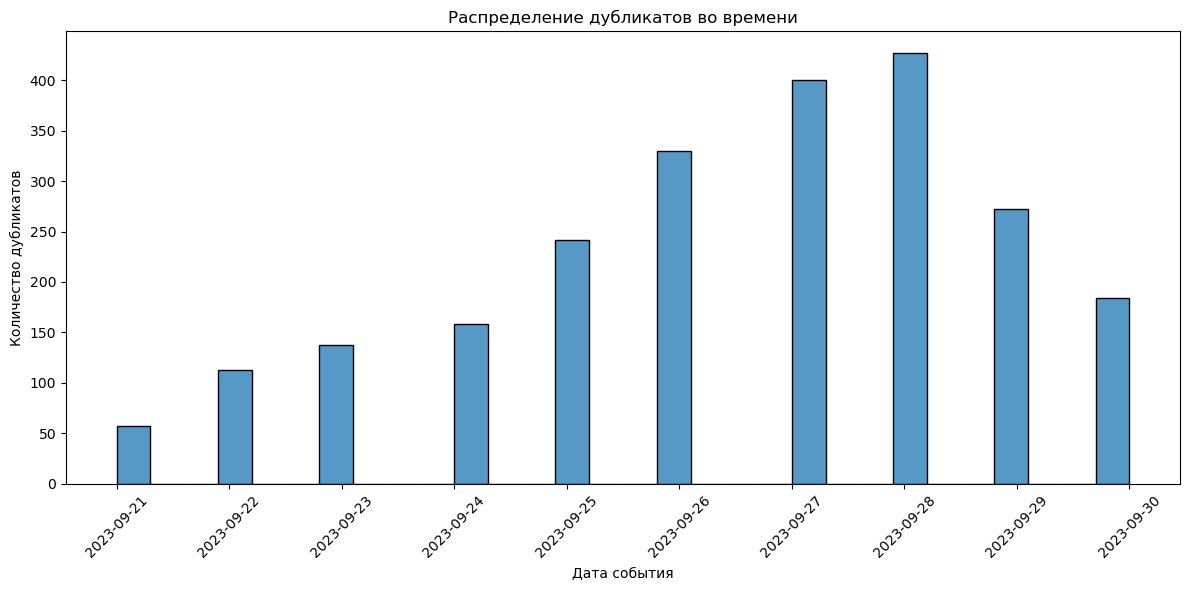

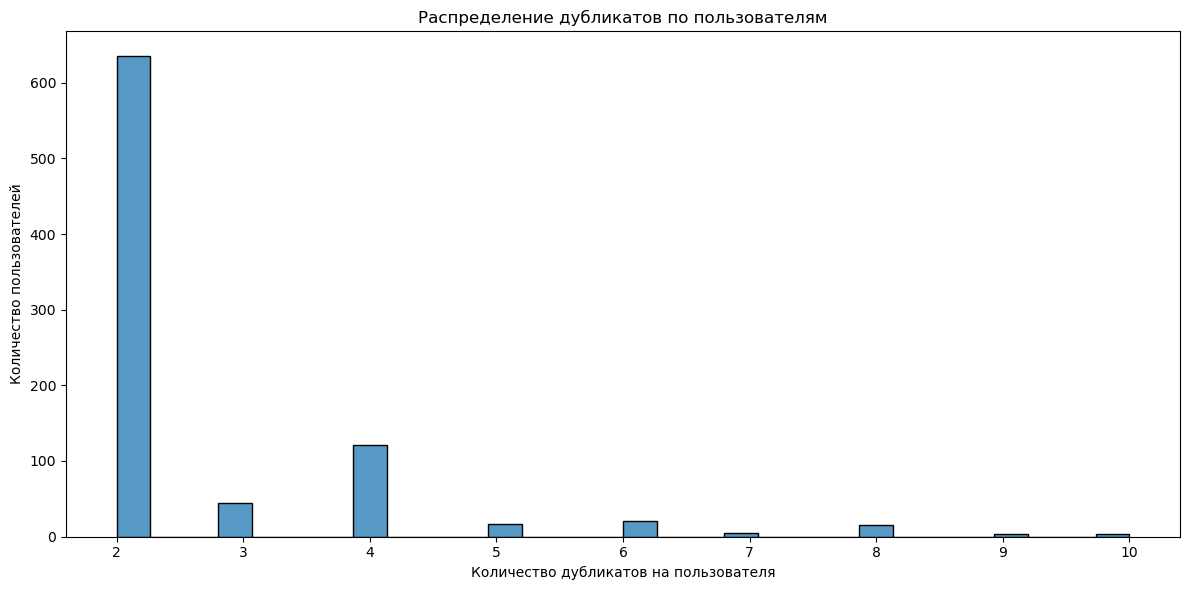

In [10]:
#распределение дубликатов по датам
plt.figure(figsize=(12, 6))
sns.histplot(ad_revenue_duplicated['event_date'], kde=False, bins=30)
plt.title('Распределение дубликатов во времени')
plt.xlabel('Дата события')
plt.ylabel('Количество дубликатов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#распределнние дубликатов по пользователям
user_counts = ad_revenue_duplicated['user_id'].value_counts()
plt.figure(figsize=(12, 6))
sns.histplot(user_counts, kde=False, bins=30)
plt.title('Распределение дубликатов по пользователям')
plt.xlabel('Количество дубликатов на пользователя')
plt.ylabel('Количество пользователей')
plt.tight_layout()
plt.show()

В данных **1.5%** дубликатов. Так как исследуются когорты, установившие игру, то это может свидетельствовать о том, что один пользователь мог просмотреть рекламу в игре несколько раз в один день и это могла быть реклама одного рекламодателя, поэтому могут совпадать и значения ревенью. В данных о рекламных доходах может быть нормальным наличие нескольких транзакций в один и тот же день для одного пользователя. Оставляем данные дубликаты.

#### Проверка на пропуски в `ad_revenue`

In [11]:
#работаем с пропусками
ad_revenue['event_revenue'].isnull().sum()

911

В столбце `event_revenue` имеется 911 пропусков, что составляет примерно **1.16%** от общего числа записей. Учитывая, что доля пропусков не очень велика, наиболее разумным подходом будет замена этих пропусков на нули. Это предполагает, что отсутствие данных о доходе означает отсутствие дохода, что кажется логичным для данных о рекламном доходе.

In [12]:
ad_revenue['event_revenue'] = ad_revenue['event_revenue'].fillna(0)
ad_revenue.isnull().sum()


install_date     0
event_date       0
event_revenue    0
platform         0
user_id          0
dtype: int64

In [13]:
ad_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78723 entries, 0 to 78722
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   install_date   78723 non-null  datetime64[ns]
 1   event_date     78723 non-null  datetime64[ns]
 2   event_revenue  78723 non-null  float64       
 3   platform       78723 non-null  object        
 4   user_id        78723 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 3.0+ MB


#### Предварительный анализ столбца `platform` в `ad_revenue`

In [14]:
# всего уникальных значений
ad_revenue['platform'].unique()

array(['android', 'ios'], dtype=object)

In [15]:
# количество пользователей в каждом уникальном значении
ad_revenue['platform'].value_counts()

android    72360
ios         6363
Name: platform, dtype: int64

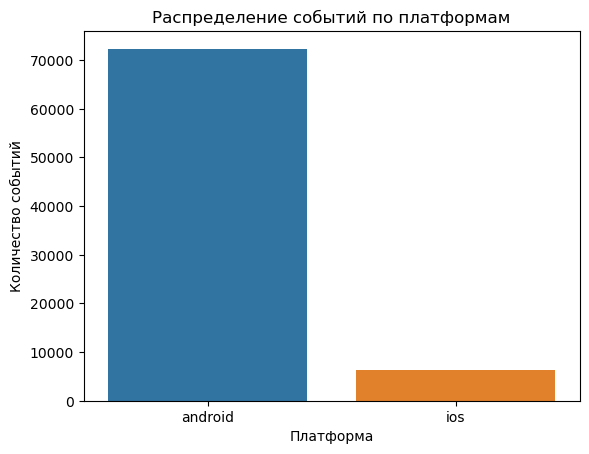

In [16]:
# график количества пользователей в каждой платформе
sns.countplot(x='platform', data=ad_revenue)
plt.title('Распределение событий по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество событий')
plt.show()

In [17]:
# суммарный доход от каждой платфоры
data_platform = ad_revenue.groupby('platform')['event_revenue'].sum().reset_index()
data_platform

,platform,event_revenue
0,android,7813.908686
1,ios,874.936242


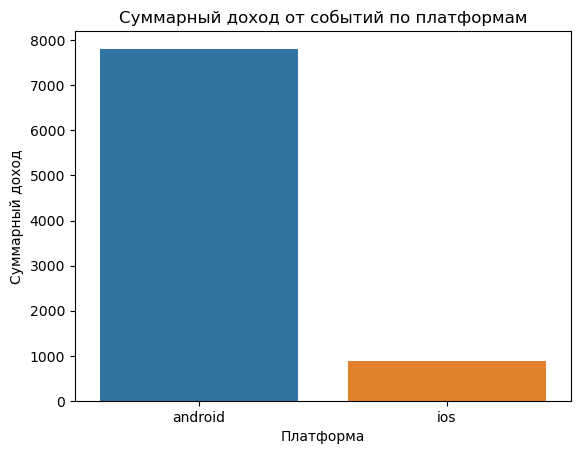

In [18]:
# график суммарного дохода по платформам
sns.barplot(x='platform', y='event_revenue', data=data_platform)
plt.title('Суммарный доход от событий по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарный доход')
plt.show()

#### Предварительный анализ столбца `install_date` в `ad_revenue`

In [19]:
# выясяем количество представленных дней
ad_revenue['install_date'].nunique()

8

In [20]:
# количество событий на каждый день установки
ad_revenue['install_date'].value_counts()

2023-09-26    14808
2023-09-25    13427
2023-09-27    12685
2023-09-28    10364
2023-09-24     8957
2023-09-23     6475
2023-09-21     6062
2023-09-22     5945
Name: install_date, dtype: int64

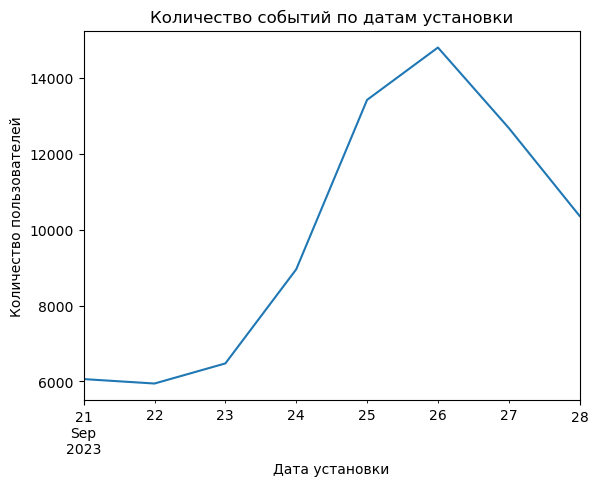

In [21]:
# Количество событий по датам установки
ad_revenue.groupby('install_date').size().plot(kind='line')
plt.title('Количество событий по датам установки')
plt.xlabel('Дата установки')
plt.ylabel('Количество пользователей')
plt.show()

install_date
2023-09-21     621
2023-09-22     595
2023-09-23     548
2023-09-24     765
2023-09-25    1212
2023-09-26    1442
2023-09-27    1456
2023-09-28    1379
Name: user_id, dtype: int64


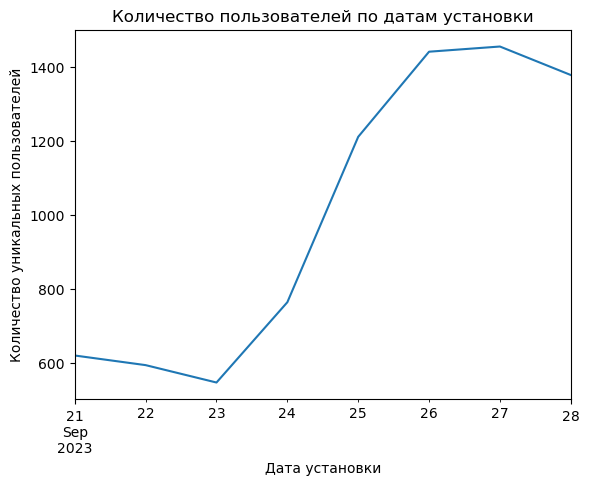

In [22]:
# Количество уникальных пользователей по датам установки
print(ad_revenue.groupby('install_date')['user_id'].nunique())

ad_revenue.groupby('install_date')['user_id'].nunique().plot(kind='line')
plt.title('Количество пользователей по датам установки')
plt.xlabel('Дата установки')
plt.ylabel('Количество уникальных пользователей')
plt.show()

Участники добавлялись 8 дней. Пик количества событий в приложении был достигнут *2023-09-26* и составил *14808* события.

#### Предварительный анализ столбца `event_date` в `ad_revenue`

In [23]:
# выясяем количество представленных дней
ad_revenue['event_date'].nunique()

10

In [24]:
# количество пользователей совершивших событие по дням
ad_revenue['event_date'].value_counts()

2023-09-28    14109
2023-09-27    13036
2023-09-26    11629
2023-09-25     8916
2023-09-29     8757
2023-09-30     6352
2023-09-24     6111
2023-09-23     4102
2023-09-22     3460
2023-09-21     2251
Name: event_date, dtype: int64

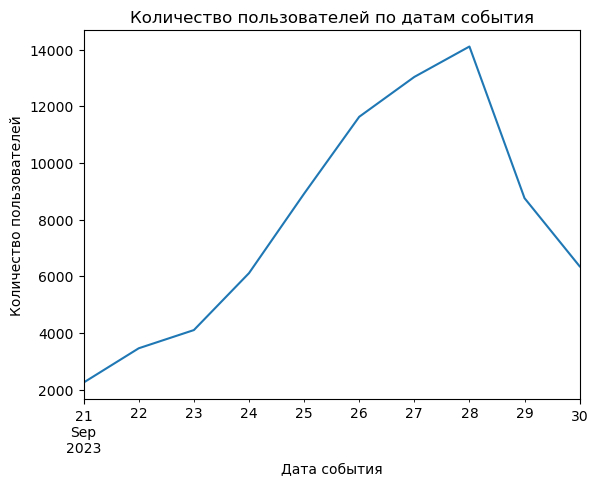

In [25]:
# Количество пользователей по датам события
ad_revenue.groupby('event_date').size().plot(kind='line')
plt.title('Количество пользователей по датам события')
plt.xlabel('Дата события')
plt.ylabel('Количество пользователей')
plt.show()

In [26]:
# суммарный доход от рекламы по датам с событием
date_sum_revenue = ad_revenue.groupby('event_date')['event_revenue'].sum().sort_values(ascending=False)
date_sum_revenue

event_date
2023-09-28    1542.643879
2023-09-27    1489.934935
2023-09-26    1281.865054
2023-09-25    1015.238850
2023-09-29     879.296382
2023-09-24     721.169231
2023-09-30     649.784867
2023-09-23     466.393848
2023-09-22     390.676763
2023-09-21     251.841119
Name: event_revenue, dtype: float64

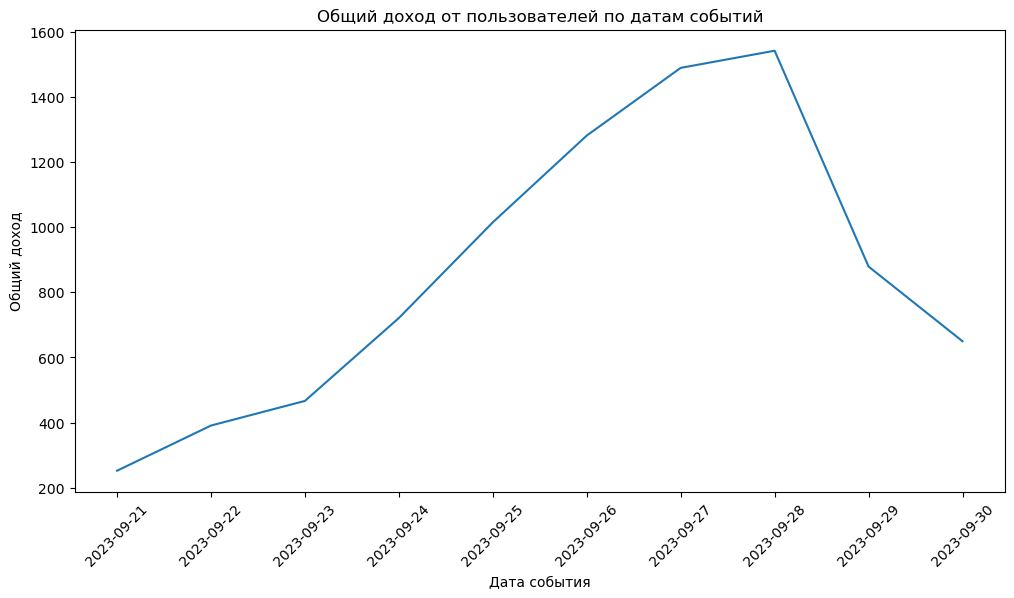

In [27]:
# график общего дохода по датам с событием
plt.figure(figsize=(12, 6))
sns.lineplot(x=date_sum_revenue.index, y=date_sum_revenue.values)
plt.xticks(rotation=45)  # Поворот меток на оси X для лучшей читаемости
plt.title('Общий доход от пользователей по датам событий')
plt.xlabel('Дата события')
plt.ylabel('Общий доход')
plt.show()

#### Вывод по предварительному анализу `ad_revenue`

В таблице с данными по рекламному заработку `ad_revenue` представлены 8 дат установки приложения `install_date`, участники добавлялись 8 дней. Пик количества установивших приложение был достигнут *2023-09-26* и составил *14808* пользователей. Также наблюдается 10 дат с совершеным событием `event_date`. Максимальный доход получен *2023-09-28*, минимальный *2023-09-21*, что в целом прямопропорционально количеству пользователей совершившим события по дням. То есть, чем больше пользователей совершили событие в этот день, то тем больше выручка за этот день.

В колонке с платформой `platform` имеется две платформы установки приложения:
- `android`
- `ios`

Где `android` превосходит `ios` по количеству пользователей в 11 раз, по суммарному доходу в 9 раз. Приложение в `android` пользуется большей популярностью.


### Знакомство со второй таблицей `installs`

In [28]:
installs.head()

,install_date,installs,platform
0,2023-09-21,1,android
1,2023-09-21,0,android
2,2023-09-21,47,android
3,2023-09-21,0,android
4,2023-09-21,0,android


In [29]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   install_date  579 non-null    datetime64[ns]
 1   installs      579 non-null    int64         
 2   platform      579 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.7+ KB


In [30]:
# определяем количество пользователей на каждый день установки 
date_installs = installs.groupby('install_date')['installs'].sum()
date_installs

install_date
2023-09-21     718
2023-09-22     671
2023-09-23     693
2023-09-24     891
2023-09-25    1349
2023-09-26    1612
2023-09-27    1649
2023-09-28    1594
Name: installs, dtype: int64

In [31]:
# количество уникальных пользователей из таблицы ad_revenue по датам установки приложения
ad_revenue.groupby('install_date')['user_id'].nunique()

install_date
2023-09-21     621
2023-09-22     595
2023-09-23     548
2023-09-24     765
2023-09-25    1212
2023-09-26    1442
2023-09-27    1456
2023-09-28    1379
Name: user_id, dtype: int64

**Количество установок из таблицы `installs` больше количества уникальных пользователей из таблицы `ad_revenue`.** Это верный признак того, что данные верны. Количество установок игры больше коичества целевых действий пользователей. Не все установившие игру сыграли в нее хотя бы один раз.

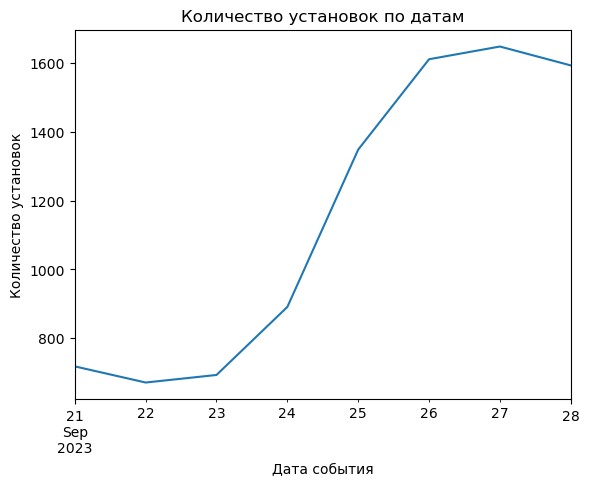

In [32]:
date_installs.plot(kind='line')
plt.title('Количество установок по датам')
plt.xlabel('Дата события')
plt.ylabel('Количество установок')
plt.show()

In [33]:
# таблица по платформам для каждой когорты
cohorts_by_platform = pd.pivot_table(installs, values='installs', index='install_date', columns='platform', aggfunc='sum')
cohorts_by_platform

platform,android,ios
install_date,,
2023-09-21,578,140
2023-09-22,530,141
2023-09-23,520,173
2023-09-24,764,127
2023-09-25,1258,91
2023-09-26,1465,147
2023-09-27,1451,198
2023-09-28,1380,214


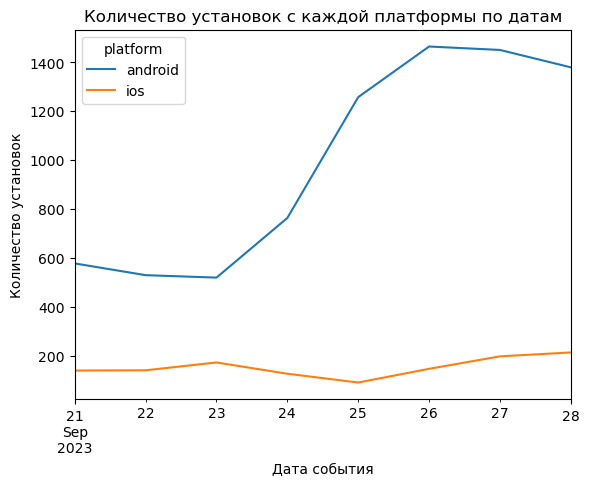

In [34]:
cohorts_by_platform.plot(kind='line')
plt.title('Количество установок с каждой платформы по датам')
plt.xlabel('Дата события')
plt.ylabel('Количество установок')
plt.show()

**Вывод:**

В данных по количеству инсталлов `installs` наблюдается 8 дат. Максимальное количество инсталлов наблюдается *2023-09-27* (7 день из 8-ми), минимальное *2023-09-22* (2 день из 8-ми). В каждый из дней существенно лидирует платформа `android`.

## Анализ изменения ревеню в первый месяц жизни у пользователей игры


In [35]:
# расчет количества дней с момента установки до даты события в новый столбец
ad_revenue['days_since_install'] = (ad_revenue['event_date'] - ad_revenue['install_date']).dt.days
ad_revenue.head()

,install_date,event_date,event_revenue,platform,user_id,days_since_install
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966,0
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821,0
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393,0
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393,0
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821,0


In [36]:
# суммирование ревеню по количеству дней с момента установки
daily_revenue_since_install = ad_revenue.groupby('days_since_install')['event_revenue'].sum().reset_index()

daily_revenue_since_install

,days_since_install,event_revenue
0,0,4340.317628
1,1,1763.112779
2,2,1017.591277
3,3,677.360541
4,4,419.001194
5,5,218.080831
6,6,125.446646
7,7,70.301701
8,8,43.807377
9,9,13.824954


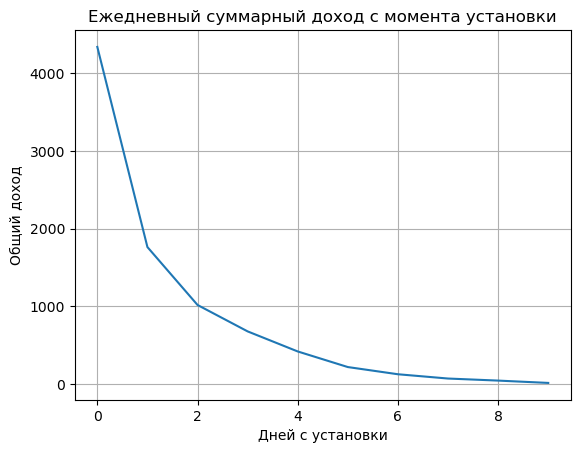

In [37]:
# график суммарного ревеню по количеству дней после установки
sns.lineplot(x='days_since_install', y='event_revenue', data=daily_revenue_since_install)
plt.title('Ежедневный суммарный доход с момента установки')
plt.xlabel('Дней с установки')
plt.ylabel('Общий доход')
plt.grid(True)
plt.show()

Из графика видно, что доход после первого дня падает более чем вдвое и продолжает убывать с течением времени. 

Учитывая, что доход уменьшается экспоненциально, *модель экспоненциального затухания* может быть наиболее точной для прогнозирования будущих значений ревеню. Экспоненциальное затухание хорошо подходит для ситуаций, когда величина быстро уменьшается и затем стабилизируется. Сделаем прогноз до 30 дня.

Для этого мы можем использовать формулу:

y = a * e ** (b * x)

где:

y — прогнозируемый ревеню,

x — количество дней с момента установки,

a и b — параметры модели, которые определяются на основе данных.

In [38]:
# функция экспоненциального затухания
def exp_attenuation(x, a, b):
    return a * np.exp(b * x)

# последовательность значений НЕЗАВИСИМОЙ переменной
x_data = daily_revenue_since_install['days_since_install']

# последовательность значений ЗАВИСИМОЙ переменной
y_data = daily_revenue_since_install['event_revenue']

# рассчет параметров для функции экспоненциального затухания (без ковариационной матрицы)
params, _ = curve_fit(exp_attenuation, x_data, y_data, p0=(1, -0.1))

# присвоение полученных параметров переменным a, b из функции exp_attenuation 
a, b = params

# вывод полученных значений
print('a =', a)
print('b =', b)

a = 4241.60690435137
b = -0.7252968147504519


Теперь можно использовать эту модель для прогнозирования ревеню на 30-й день.

Сначала прогнозируем ревеню для 30-го дня, а затем рассчитаем, во сколько раз увеличится ревеню 0-го, 1-го и 3-го дней к 30-му дню.

In [39]:
# прогноз дохода на 30 день
revenue_30_day = exp_attenuation(30, a, b)

# получаем доход на 0, 1, 3 дни
revenue_0_day = daily_revenue_since_install.loc[daily_revenue_since_install['days_since_install'] == 0, 'event_revenue'].values[0]
revenue_1_day = daily_revenue_since_install.loc[daily_revenue_since_install['days_since_install'] == 1, 'event_revenue'].values[0]
revenue_3_day = daily_revenue_since_install.loc[daily_revenue_since_install['days_since_install'] == 3, 'event_revenue'].values[0]

# расчет увеличения дохода 0, 1, 3 дня к 30
increase_0_day = revenue_0_day / revenue_30_day 
increase_1_day = revenue_1_day / revenue_30_day 
increase_3_day = revenue_3_day / revenue_30_day 

revenue_30_day, increase_0_day, increase_1_day, increase_3_day

(1.5057687705148642e-06,
 2882459586.7504444,
 1170905396.3160245,
 449843664.0895346)

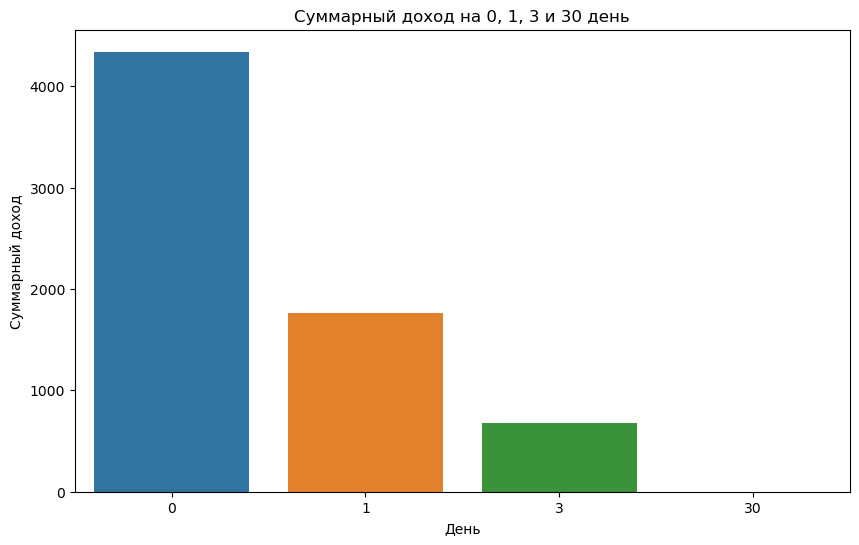

In [40]:
days = ['0', '1', '3', '30']
revenues = [revenue_0_day, revenue_1_day, revenue_3_day, revenue_30_day]

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=revenues)
plt.title('Суммарный доход на 0, 1, 3 и 30 день')
plt.xlabel('День')
plt.ylabel('Суммарный доход')
plt.show()

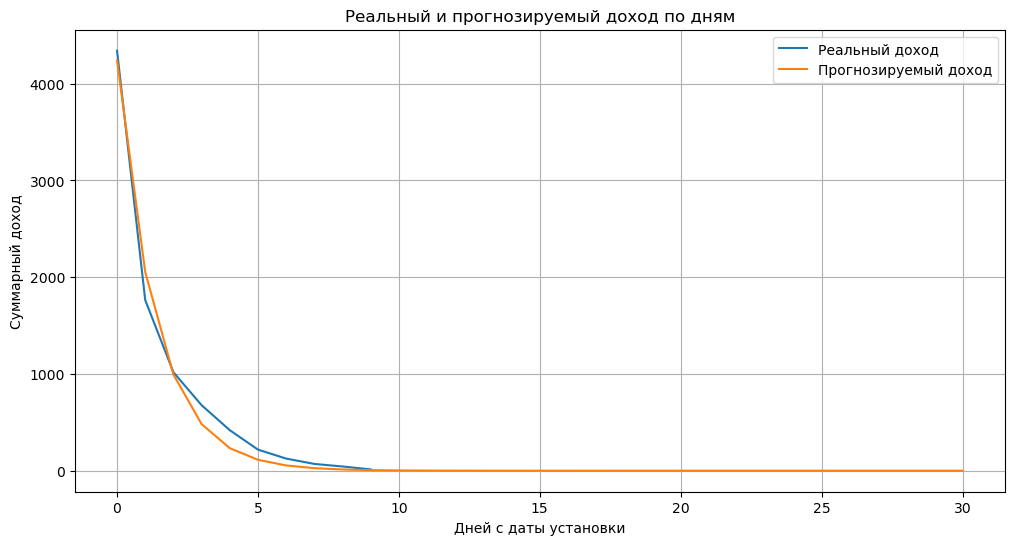

In [41]:
# генерация данных о прогнозируемом доходе с использованием модели экспоненциального затухания.
predicted_days = np.arange(0, 31)  # дни с 0 по 30
predicted_revenue = exp_attenuation(predicted_days, a, b)

# графики реального (10 дней) и спрогнозированного (30 дней) дохода приложения
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_since_install', y='event_revenue', data=daily_revenue_since_install, label='Реальный доход')
sns.lineplot(x=predicted_days, y=predicted_revenue, label='Прогнозируемый доход')
plt.title('Реальный и прогнозируемый доход по дням')
plt.xlabel('Дней с даты установки')
plt.ylabel('Суммарный доход')
plt.legend()
plt.grid(True)
plt.show()

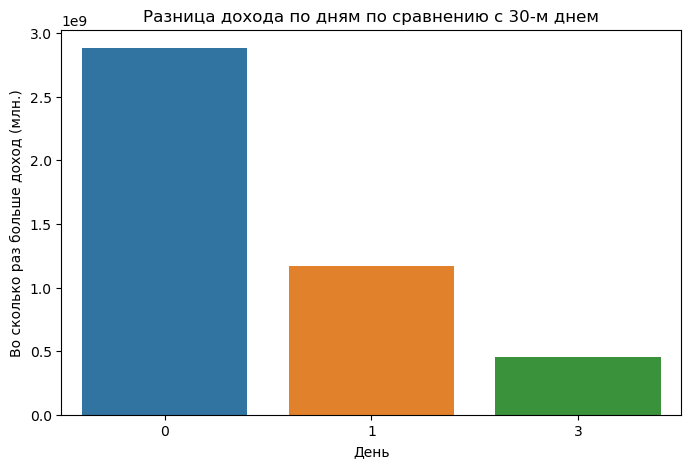

In [42]:
# во сколько раз увеличится ревеню нулевого дня (день установки игры), первого и третьего дня к 30-му дню
days = [0, 1, 3]
increases = [increase_0_day, increase_1_day, increase_3_day]

# график увеличения дохода
plt.figure(figsize=(8, 5))
sns.barplot(x=days, y=increases)
plt.title('Разница дохода по дням по сравнению с 30-м днем')
plt.xlabel('День')
plt.ylabel('Во сколько раз больше доход (млн.)')
# plt.yscale('log')  # используем логарифмическую шкалу из-за широкого диапазона значений
plt.show()

## Итоговый вывод

**Вывод:** К 30-му дню прогнозируемый ревеню уменьшился до очень низкого значения, что говорит о значительном снижении интереса пользователей к игре или сокращении времени, проводимого в игре. Ревеню нулевого дня **больше** ревеню 30-го чуть менее, чем в 2.9 млн. раз!

Это уменьшение может быть связано с убывающей активностью пользователей, что является общей тенденцией для многих мобильных игр и приложений после первых дней использования.

# Тестовое задание №2


Как вы думаете, какие проекты являются основными конкурентами?

https://play.google.com/store/apps/details?id=com.matryoshka.cityrescueteam

Почему?

Изучил ссылку из задания и создал таблицу с вероятными конкурентами. За конкурентов принимал игры с рейтингом не ниже 4.4, как у целевой игры. Также важным критерием было наличие игры в разделе **Похожие игры**, при этом не далее 3-й ссылки от целевой игры. 

В колонках представлены следующие данные:
- `title` - название игры
- `rating` - рейтинг
- `cnt_reviews` - количество отзывов
- `cnt_download` - количеств скачиваний
- `age` - возрастной рейтинг
- `genre`- жанр
- `casual` - казуальная(да/нет: 1/0)
- `singleplayer` - однопользовательская (да/нет: 1/0)
- `offline` - оффлайн (да/нет: 1/0)
- `publisher` - издетель
- `page1` - наличие в разделе `Похожие игры` на первой странице (да/нет: 1/0)

In [53]:
#путь к файлу с данными
path = 'D:\Резюме Андрей Финальные\Тестовые от работодателей\Матрешка\Casual_games.csv'

try:
    games = pd.read_csv(path)
except:
    print('Укажите верный путь к данным!')
    
games

,title,rating,cnt_reviews,cnt_download,age,genre,casual,singleplayer,offline,publisher,page1
0,Rescue Dash: тайм-менеджмент,4.4,30000,1000000,3+,симулятор,1,1,1,Matryoshka,0
1,Fiona's Farm,4.4,86000,1000000,3+,головоломка,1,1,1,Ace Academy Teknoloji A.Ş.,1
2,Goodville: Ферма и экспедиции,4.7,95600,1000000,3+,симулятор,0,1,0,Stork Limited,0
3,Island Farm Adventure,4.5,6370,500000,3+,симулятор,1,1,1,DailyFun,0
4,Kong Island: Farm & Survival,4.4,21300,1000000,3+,симулятор,1,1,0,CSCMobi Studios,0
5,Bermuda Adventures: ферма,4.6,306000,10000000,12+,симулятор,0,1,0,BELKA GAMES,0
6,Taylor's Secret: Merge story,4.5,6860,100000,3+,головоломка,1,0,0,Merge story,1
7,Delicious B&B: Decor & Match 3,4.5,51900,1000000,3+,головоломка,1,1,0,GameHouse Original Stories,1
8,Royal Farm,4.7,121000,5000000,3+,симулятор,0,1,0,UGO Games,0
9,Farmington – Игра-ферма,4.8,105000,5000000,3+,симулятор,1,1,0,UGO Games,0


In [54]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         14 non-null     object 
 1   rating        14 non-null     float64
 2   cnt_reviews   14 non-null     int64  
 3   cnt_download  14 non-null     int64  
 4   age           14 non-null     object 
 5   genre         14 non-null     object 
 6   casual        14 non-null     int64  
 7   singleplayer  14 non-null     int64  
 8   offline       14 non-null     int64  
 9   publisher     14 non-null     object 
 10  page1         14 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.3+ KB


In [63]:
# сгруппируем по количеству отзывов
games.sort_values(by='cnt_reviews', ascending=False)

,title,rating,cnt_reviews,cnt_download,age,genre,casual,singleplayer,offline,publisher,page1
5,Bermuda Adventures: ферма,4.6,306000,10000000,12+,симулятор,0,1,0,BELKA GAMES,0
8,Royal Farm,4.7,121000,5000000,3+,симулятор,0,1,0,UGO Games,0
9,Farmington – Игра-ферма,4.8,105000,5000000,3+,симулятор,1,1,0,UGO Games,0
2,Goodville: Ферма и экспедиции,4.7,95600,1000000,3+,симулятор,0,1,0,Stork Limited,0
1,Fiona's Farm,4.4,86000,1000000,3+,головоломка,1,1,1,Ace Academy Teknoloji A.Ş.,1
7,Delicious B&B: Decor & Match 3,4.5,51900,1000000,3+,головоломка,1,1,0,GameHouse Original Stories,1
11,Adventure Bay - Farm Games,4.5,45100,1000000,3+,симулятор,1,1,0,GAMEGOS,0
10,Superfarmers：Ферма супергероев,4.6,37000,1000000,3+,симулятор,1,1,0,HeroCraft Ltd.,0
0,Rescue Dash: тайм-менеджмент,4.4,30000,1000000,3+,симулятор,1,1,1,Matryoshka,0
12,Кулинарная Лихорадка Короля,4.6,21400,1000000,3+,симулятор,1,1,1,Matryoshka,0


`Bermuda Adventures: ферма` единственная игра с рейтингом 12+. Имеет самое большое число скачиваний и отзывов. Вряд ли с ней можно успешно конкурировать целевой игре.

In [70]:
# отсортируем по рейтингу и количеству отзывов
games.sort_values(by=['rating', 'cnt_reviews', 'page1'], ascending=[False, False, False])

,title,rating,cnt_reviews,cnt_download,age,genre,casual,singleplayer,offline,publisher,page1
9,Farmington – Игра-ферма,4.8,105000,5000000,3+,симулятор,1,1,0,UGO Games,0
8,Royal Farm,4.7,121000,5000000,3+,симулятор,0,1,0,UGO Games,0
2,Goodville: Ферма и экспедиции,4.7,95600,1000000,3+,симулятор,0,1,0,Stork Limited,0
5,Bermuda Adventures: ферма,4.6,306000,10000000,12+,симулятор,0,1,0,BELKA GAMES,0
10,Superfarmers：Ферма супергероев,4.6,37000,1000000,3+,симулятор,1,1,0,HeroCraft Ltd.,0
12,Кулинарная Лихорадка Короля,4.6,21400,1000000,3+,симулятор,1,1,1,Matryoshka,0
13,Кафе на грани: кулинарная игра,4.6,17600,1000000,3+,симулятор,1,1,1,Matryoshka,0
7,Delicious B&B: Decor & Match 3,4.5,51900,1000000,3+,головоломка,1,1,0,GameHouse Original Stories,1
11,Adventure Bay - Farm Games,4.5,45100,1000000,3+,симулятор,1,1,0,GAMEGOS,0
6,Taylor's Secret: Merge story,4.5,6860,100000,3+,головоломка,1,0,0,Merge story,1


In [77]:
games.sort_values(by=['page1', 'rating', 'cnt_download', 'cnt_reviews'], ascending=[False, False, False, False]).head(3)

,title,rating,cnt_reviews,cnt_download,age,genre,casual,singleplayer,offline,publisher,page1
7,Delicious B&B: Decor & Match 3,4.5,51900,1000000,3+,головоломка,1,1,0,GameHouse Original Stories,1
6,Taylor's Secret: Merge story,4.5,6860,100000,3+,головоломка,1,0,0,Merge story,1
1,Fiona's Farm,4.4,86000,1000000,3+,головоломка,1,1,1,Ace Academy Teknoloji A.Ş.,1


**Итоговый вывод по второму заданию:**

При переходе на страницу целевой игры наиболее вероятным конкурентом предположительно стоит считать наиболее похожую игру по максимуму критериев, которая находится в разделе **Похожие игры** в Google play. В этих играх видно в превью только рейтинг, поэтому это значение и будет решающим при выборе другой игры. Далее смотрят на количество скачиваний, количество отзывов (иногда эти значения могут меняться) и другие критерии. Также имеет значение в каком порядке расположены игры в этом разделе.

По совокупности критериев наиболее вероятные конкуренты расположились в следующем порядке:

- Delicious B&B: Decor & Match 3	
- Taylor's Secret: Merge story	
- Fiona's Farm

Однако у всех этих игр есть слабое место: жанр `головоломка`, отличный от жанра целевой игры `симулятор`. Также из этих трех игр режим `офлайн` есть только у **Fiona's Farm**, что делает эту игру наиболее явным конкурентом, поскольку режим `офлайн`, может для неопытного пользователя (смотри возрастное ограничение) говорить о том, что в игре нет рекламы при игре в *авиарежиме*, что, в свою очередь, может стать решающим фактором при выборе игры. А оглядываясь на результаты первого тестового задания (двухкратное падение доходности на второй день), факт быстрого отскока нового пользователя от разочарования из-за наличия рекламы в `офлайн`-режиме не пугает издателя игры. Главное - установленная игра и хотя-бы одно целевое действие (просмотр рекламы).

Подводя итог, по совокупности всех критериев можно предположить, что наиболее вероятным конкурентом игры *Rescue Dash: тайм-менеджмент* является головоломка **Fiona's Farm**.


# Тестовое задание №3

В качестве эксперимента протестировали два разных варианта баланса
уровней(A/B). Через месяц получили следующие результаты:

- `Cohort` - когорта
- `Paying Share` - % платящих пользователей
- `APRU` - средний доход на пользователя
- `RetentionD30` - удержание через 30 дней

    - A
    - 10%
    - $1
    - 5%

        - B
        - 14%
        - $0.8
        - 4%

**Задача:** Как Вы считаете, когорта с каким балансом перспективнее? Почему?


In [46]:
# создаем датафрейм сразу с удобной подписью столбцов
data = {
    'cohort': ['A', 'B'],
    'paying': [0.10, 0.14], 
    'arpu': [1, 0.8],  
    'retention': [0.05, 0.04]  
}

df = pd.DataFrame(data)
df

,cohort,paying,arpu,retention
0,A,0.10,1.0,0.05
1,B,0.14,0.8,0.04


Предварительые выводы по данным:
- По доле платящих пользователей когорта `В`  интереснее
- По ARPU интереснее когорта `А` 
- По удержанию интереснее когорта `А`

In [47]:
# общий доход с пользователя в каждой когорте
df['paying'] * df['arpu']

0    0.100
1    0.112
dtype: float64

**Итоговый вывод по заданию:**
___________________________________________________________________________________________________________________________

Изначально средний доход на пользователя (APRU) выше в когорте `A`, но когда мы учитываем долю платящих пользователей, общий доход на пользователя оказывается немного **выше** в когорте **`B`**.

Когорта `B` кажется немного более перспективной с точки зрения монетизации в **краткосрочной** перспективе из-за более **высокой доли платящих пользователей и общего дохода на пользователя**. Однако, немного более высокое удержание пользователей в когорте `A` может способствовать лучшей долгосрочной монетизации.

Учитывая первое задание и его результаты (ревеню на 30-й день в 2.9 млн. раз **ниже** ревеню 0-го дня), то когорта **`В`** кажется **более перспективной**.